In [ ]:
# Execute this cell to install dependencies
%pip install sf-hamilton[visualization]

# Hamilton notebook extension [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dagworks-inc/hamilton/blob/main/examples/kedro/hamilton-code/notebooks/interactive.ipynb) [![GitHub badge](https://img.shields.io/badge/github-view_source-2b3137?logo=github)](https://github.com/dagworks-inc/hamilton/blob/main/examples/kedro/hamilton-code/notebooks/interactive.ipynb)

This notebook allows to load Hamilton dataflow definition from files and edit them interactively. It uses [Hamilton Jupyter Magics](https://hamilton.dagworks.io/en/latest/how-tos/use-in-jupyter-notebook/#use-hamilton-jupyter-magic).

## Imports
Import modules and load Jupyter magics

In [1]:
from hamilton import driver
%load_ext hamilton.plugins.jupyter_magic

## Dataflow definition
The next two cells use `%insert_module` to load source code and insert it in a cell. The inserted cells use `%%cell_to_module` to register the cell as a Python module. 

Execute each cell once before going to the next section.

In [2]:
%insert_module ../src/hamilton_code/data_processing.py

In [4]:
%insert_module ../src/hamilton_code/data_science.py

Executing the previous cells should have registered the modules `data_processing` and `data_science`. Run the next cell to verify.

Editing and re-executing the above files will update the module definitions

In [6]:
print(data_processing.companies)
print(data_science.split_data)

<function companies at 0x7f8bbd6944c0>
<function split_data at 0x7f8c10087d00>


## Dataflow execution
We can now build a Hamilton `Driver` to execute the dataflow defined by our modules `data_processing` and `data_science`.

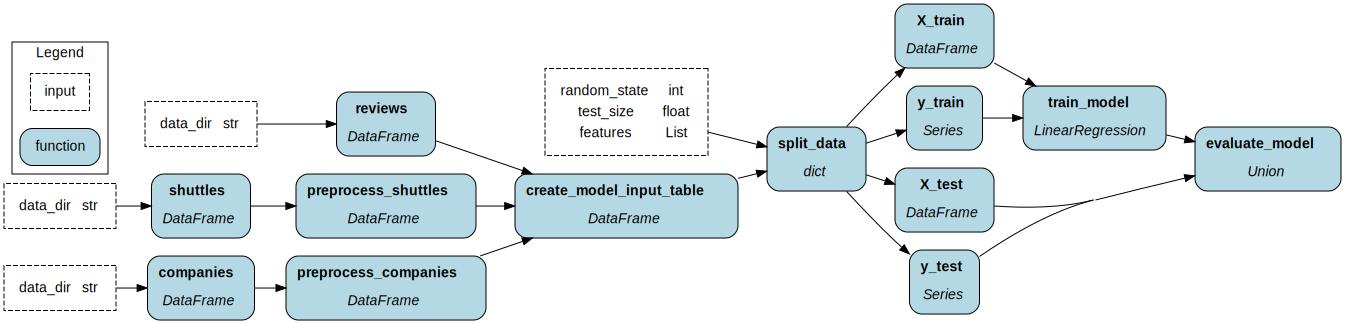

In [7]:
dr = driver.Builder().with_modules(data_processing, data_science).build()
dr

In [8]:
inputs = dict(
    data_dir="../data/",
    test_size=0.2,
    random_state=3,
    features=[
        "engines",
        "passenger_capacity",
        "crew",
        "d_check_complete",
        "moon_clearance_complete",
        "iata_approved",
        "company_rating",
        "review_scores_rating",
    ],
)
results = dr.execute(["evaluate_model"], inputs=inputs)
print(results)

{'evaluate_model': 0.3869831978103261}
